<h1><center>Can a linear regression analysis of the parameters of a 3D print be used to predict the roughness [µm], ultimate tensile strength [MPa], and elongation [%] of a 3D-printed part?</center></h1>

<h2><center>Nathan Leuranguer</center></h2>

# Background & Introduction

## Research Paper

This research problem is based on the following research paper: "[Investigation on the manufacturing variants
influential on the strength of 3D printed products](https://jresm.org/archive/resm2019.171me3112.pdf)" [2].

The corresponding dataset used in the following analyses can be found here: [3D-Printing Dataset](https://www.kaggle.com/datasets/afumetto/3dprinter/)

## Problem Motivation

3D printing is a cost-effective and very effective method of additive manufacturing that entails an automated machine arm depositing material layer by layer in a confined printing space, to create a final structure or part. 3D printing is an incredibly popular method of manufactuirng whose benefits include production on demand, low lead times and low material, tooling and labor costs. For these reasons, it is generally used for rapidly prototyping parts at low-to-medium scale, where businesses observe a much lower marginal cost and lower lead times, along with much greater production flexibility [1]. Consider the cost of purchasing a custom mold for a plastic part — the tens of thousands of dollars it may cost is only justified at significant production volumes; a 3D print, although slower during the actual manufacturing process, doesn't require designing custom tooling and usually costs no more than a few dollars for each print.

Fused deposition modelling (FDM) printing is one type of 3D printing which we will be analyzing in this report. This method works by heating up a polymer (often a thermoplastic like PLA), and extruding it through a nozzle that deposits the molten material on top of the previous layer of the structure. Below is a side-view schematic of the FDM printing process.

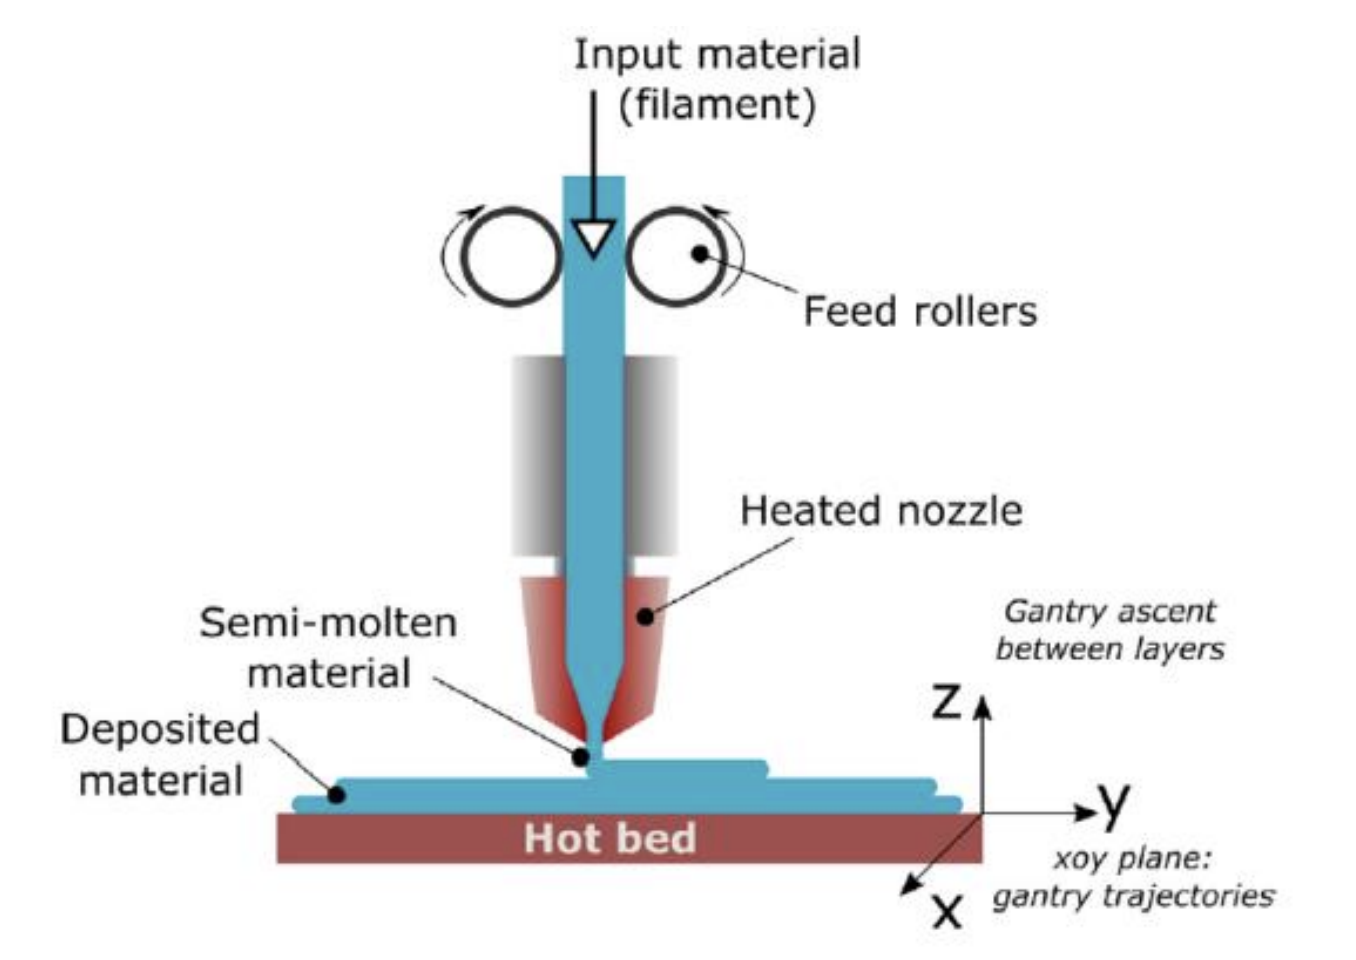

#### <center><u>Figure 1</u>: Fused deposition modelling (FDM) 3D printer schematic<br> Image Source: [2]</center>

As expected, the specific print parameters that are chosen can influence crucial characteristics of the resultant part, such as its ultimate tensile strength, plasticity, toughness, and material roughness, among others. For instance, it has been shown that a part having smaller print layers is inversely correlated with the fracture strength of the resultant part [2]. That is, finer print layers (see Figure 1 below) cause the final structure to have a greater material fracture strength.

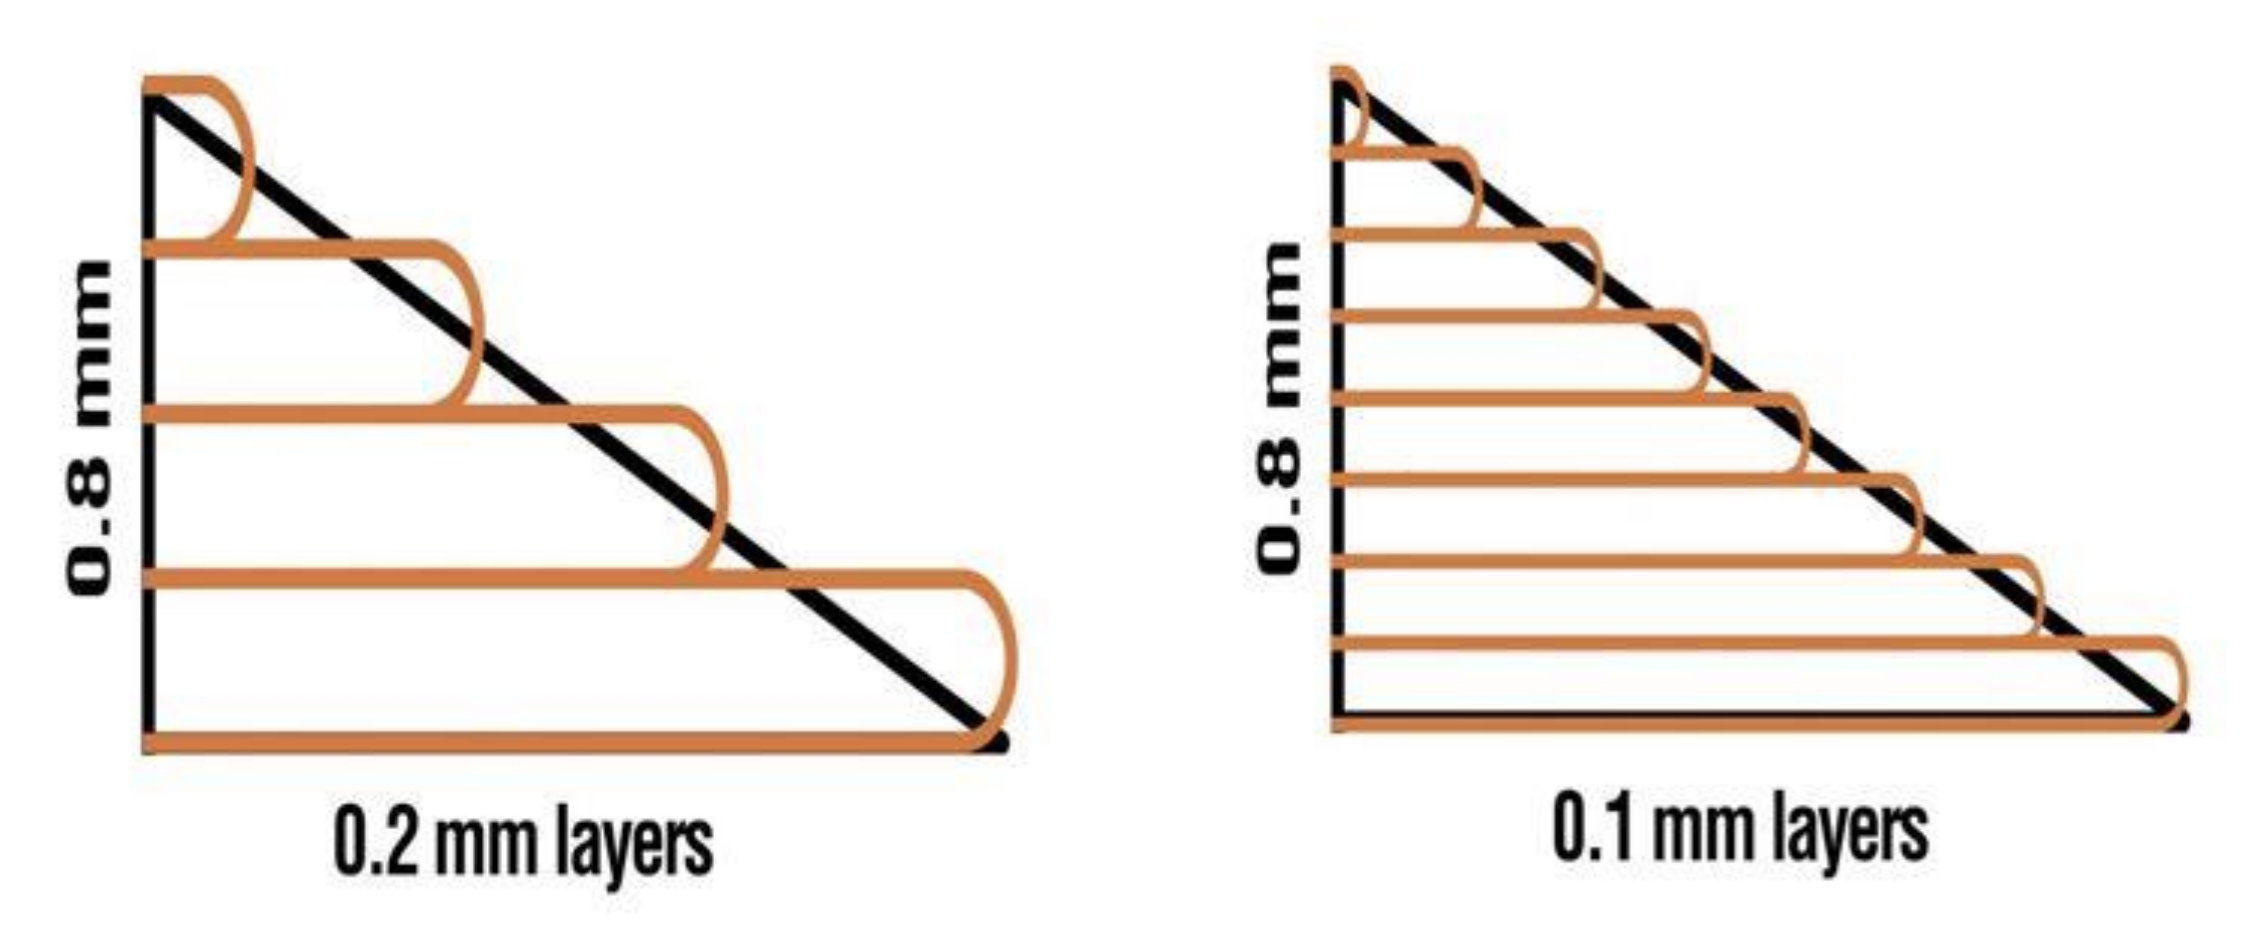

#### <center><u>Figure 2</u>: 3D print layer height comparison for equal volume<br> Image Source: [2]</center>

Another example is the infill density — voluminous sections of 3D prints are normally not filled in completely, but are rather filled in by structures like honeycombs or grds; Figure 2 below shows three different infill percentages for the same 3D-printed part. This decreases the time taken for the 3D print to occur, and uses less material, generally without compromising much of the desired material characteristics (e.g. ultimate tensile strength, yield strength, etc).

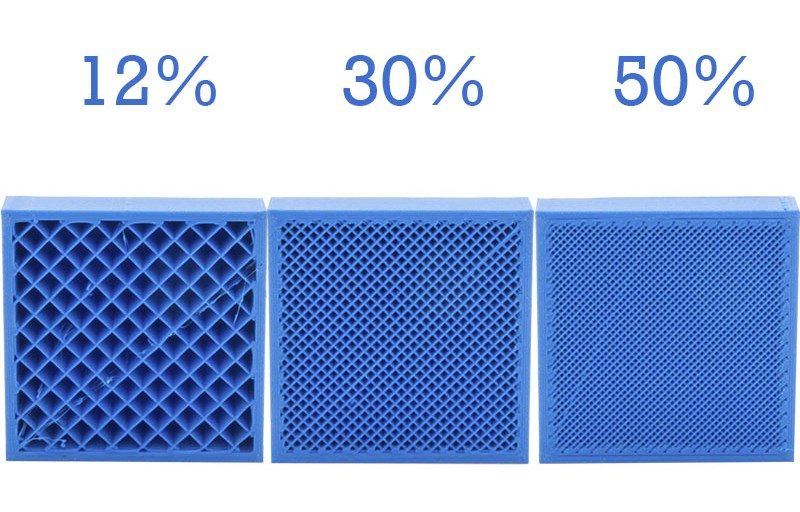

#### <center><u>Figure 3</u>: Different infill percentage values for the same 3D-printed part<br> Image Source: [3]</center>

The goal of the analyses we will conduct in this report is to determine whether a linear regression analysis can be used to consider all of the most important print parameters in aggregate, to be able to predict the final output characteristics of the print. The dataset used for this report considers the most print parameters that are customizable in pre-print processing softwares like Cura.

Generating a predictive regression model to consider these values together and predict output characteristics could be tremendously valuable for prototyping parts used for engineering purposes, as it could inform the probable characteristics of the final part before going ahead with a print, and help engineers tune parameters to optimize for the characteristics that they need. This would add greatly to the strengths of 3D printing as a low-cost, highly efficient manufacturing method described above.

# Methods

## Technique — Ordinary Least Squares (OLS) Multivariable Linear Regression

As described in the problem statement of this notebook, the aim of the following analyses is to be able to ascertain whether we can use linear regression to predict the roughness, ultimate tensile strength and elongation of a 3D-printed part. These three outputs serve as the 'dependent variable' in our three separate analyses, and the inputs are the nine print features described in the section above (the 'independent variables') — we will call these print features 'parameters' for mathematical clarity. For the purpose of these analyses, it is assumed that each of these nine parameters are completely independent and that any multicollinearity is negligible; i.e. no two independent variables are significantly collinear.

In simple terms, a multivariable linear regression is an equation that states that the dependent variable (output) is equal to a linear combination of the input parameters [4], as shown in the equation below:

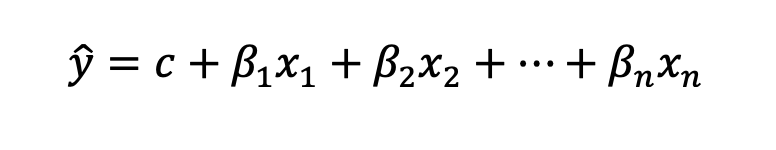

The x_i values are the input parameters; the beta values are the weights assigned to each parameter, and c is the constant term by which the equation is offset. This equation, once trained, is the 'model' through which we make predictions about unseen data. The 'training' of the data means finding the weights (beta 1, beta 2, ...) of the equation. In our case, this will be accomplished using the Ordinary Least Squares (OLS) technique from the LinearRegression() method in the scikit-learn Python package. The details of this mathematical technique is discussed below.

In more visual terms, training the data to find these terms means finding the hyperplane that will minimize the sum of all the squares of the residuals (differences between predicted and actual input values). To illustrate this concept, if the model only had one input variable, the training would create a straight line through the data that minimizes the sum of all the squared distances between the line and actual data points. For 2 input variables, the training would create a plane that cuts through the data in a way that minimizes the squared distance between the plane and the actual data points. Note that in both of these examples cases, and for all higher dimensions, the analysis is purely linear — i.e. the input variables and their weights are both scalars.

As alluded to above, the concept of OLS entails minimizing the sum of the squares of the residuals - below is a development of this idea in mathematical notation [5]:

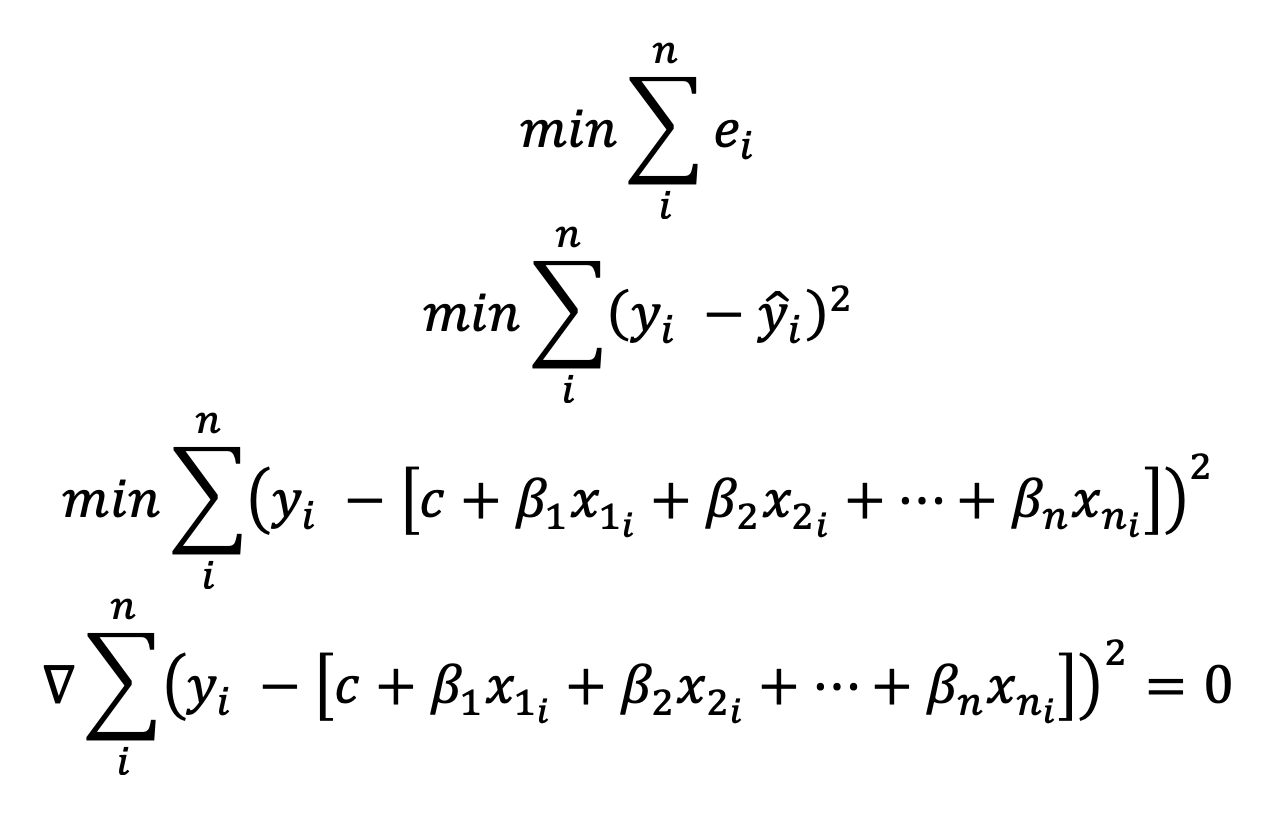

Following the concepts of differential calculus, we find the minimum of the this function by taking the gradient of the sum function (shown in the last line) — that is, we take the derivative of this function with respect to each variable beta as well as the constant term, leaving us with 10 equations for our analyses (9 input parameters + 1 constant term). We can rearrange each of these equations in terms of the beta or constant term by itself — and, since these 10 equations are functions of x_#_i and y_i (which are all known quantities because they are the values from the training dataset), finding the weights and constant terms is a matter of solving the simultaneous system of equations.

## Error Metrics

Error metrics are the values used to assess the quality of our models, as well as their performance on unseen testing data.

We will primarily make use of the r-squared value, which evalutes the 'goodness of fit' of a model to the training data, and therefore measures how accurately the predicted outputs match the actual outputs. A value close to 1 or -1 denotes a strong correlation between the independent and dependent variable (positive or negative), and therefore strong predictive power. A value closer to 0 denotes a weak correlation. We will similarly use it in the context of evaluating how our trained model performs on unseen testing data. The equation is defined as follows [6]:

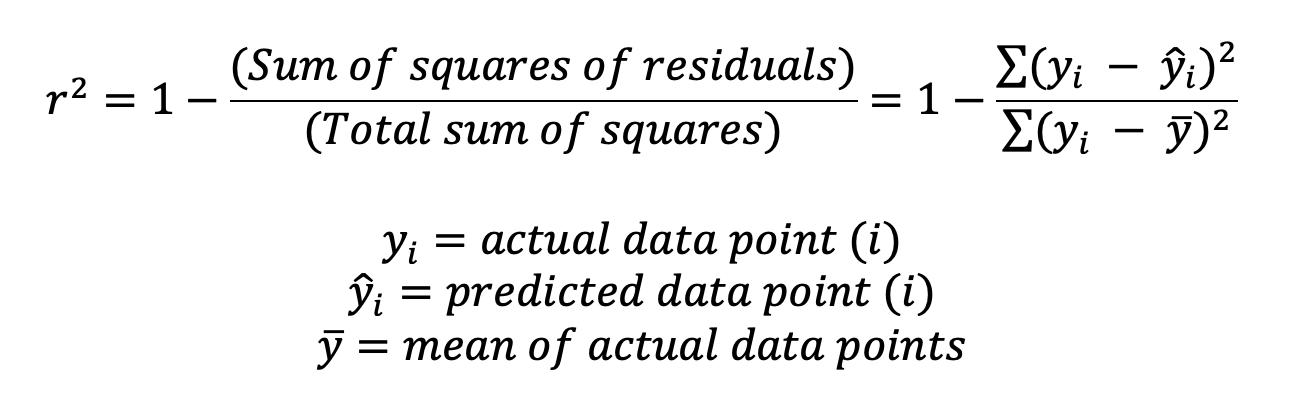

We will also use the Mean Absolute Percentage Error (MAPE), which is anaologous to the mean absolute error (MAE) but contextualizes it to the scale of the actual output data, in order to illustrate how far the predicted data is from the actual data, as a percentage of the actual data. That is, it normalizes the residuals by the scale of the actual data, making it scale-independent and more easily interpretable than MAE. This value is calculated as follows:

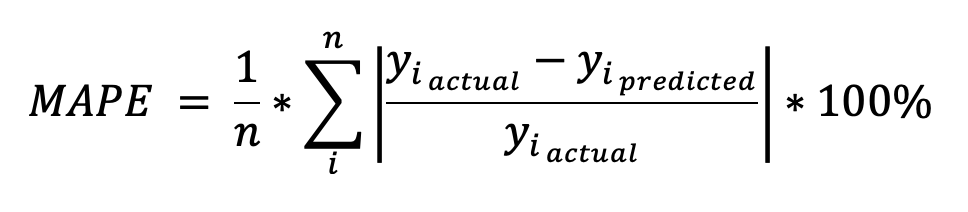

# Analysis

We begin our linear regression analyses by importing all necessary python packages and data required for each of the analyses.

Note that the two columns that host non-numerical data ('infill_pattern' and 'material') are converted to either 0 or 1; this conversion of text data to numerical data enables the mathematical techniques used in scikit-learn's linear regression analysis — the program won't run without this step. However, this does not compromise the 'quality' of the input data; this is because the text data is merely representative, and inputting '0' instead of 'grid' will result in the same weight that accounts for the statistical influence that that metric has on the data.

NOTE: Uncomment and run the following lines of code if installation of these Python packages has not yet been done on your local machine.

In [53]:
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install tabulate

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tabulate import tabulate

# import data
print_data = pd.read_csv('data.csv')

# rename misspelled columns
print_data.rename(columns={'tension_strenght': 'tension_strength'}, inplace=True)

# convert 'infill_pattern' and 'material' columns to numerical values
print_data['infill_pattern'] = print_data['infill_pattern'].replace({'grid':0, 'honeycomb':1})
print_data['material'] = print_data['material'].replace({'abs':0, 'pla':1})

print("Representative sample of the dataset — the last 3 columns are the outputs:")
print_data.head()

Representative sample of the dataset — the last 3 columns are the outputs:


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [55]:
# define training data parameters (remove y label columns)
X = print_data.drop(['roughness','tension_strength','elongation'], axis=1)

## Output 1 — Analyzing 3D print parameter influence on rougness [µm]

In [56]:
# assign roughness as output label for our first analysis
y = print_data['roughness']

In [57]:
# split both parameter and label data into 70-30 train-test split
# 'random_state' seed is added to obtain identical results each time the program is ran
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# fit scikit-learn's Ordinary Least Squares linear regression model to training data
roughness_model = LinearRegression()
roughness_model.fit(X_train, y_train)

constant = roughness_model.intercept_ # regression equation constant term
coefficients = roughness_model.coef_ # regression equation parameter coefficients

In [58]:
# display equation for readability
params = X.columns.tolist()
roughness_equation = "Roughness [µm] = {}".format(round(constant,3))
for i, coeff in enumerate(coefficients):
    sign = '+'
    if coeff < 0:
        sign = ''
    roughness_equation += "\n {}{} * {}".format(sign, round(coeff,3), params[i])

print(roughness_equation)

Roughness [µm] = -2837.676
 +1197.213 * layer_height
 +0.865 * wall_thickness
 -0.079 * infill_density
 -10.886 * infill_pattern
 +12.98 * nozzle_temperature
 -0.527 * bed_temperature
 +0.82 * print_speed
 +253.783 * material
 -2.634 * fan_speed


Above is the multivariable linear regression equation that scikit-learn's Ordinary Least Squares (OLS) analysis provided, given the training data.

Below is a plot comparing the model-predicted roughness values vs. the actual roughness values from the training data. The dotted red line represents the line of perfect correlation — the closer a data point is to this line, the more accurately the model predicted what the roughness value would be, for that particular set of 3D-print parameters.

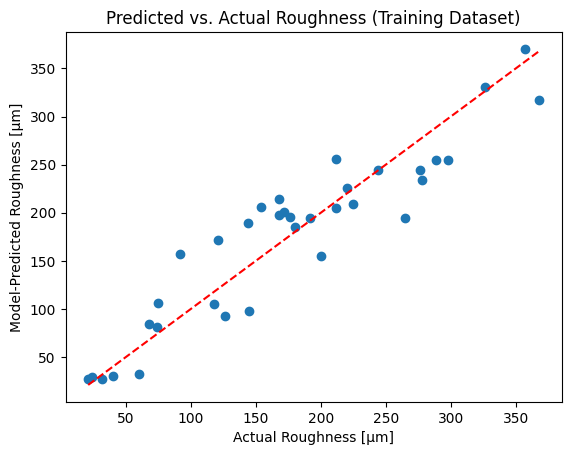

In [59]:
# fit the testing data to the above-trained model
y_train_prediction = roughness_model.predict(X_train)

# visualize the the actual vs. predicted output values on a scatter plot
plt.scatter(y_train, y_train_prediction)

# plotting dotted red line representing theoretically perfect correlation
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Roughness [µm]")
plt.ylabel("Model-Predicted Roughness [µm]")
plt.title(label="Predicted vs. Actual Roughness (Training Dataset)")
plt.show()

In [60]:
# using scikit metrics class to determine r2-score and MAPE of model's fit to training data
roughness_train_r2 = round(metrics.r2_score(y_train, y_train_prediction),3)
roughness_train_mape = round(100 * metrics.mean_absolute_percentage_error(y_train, y_train_prediction),2)

print("r^2 score: ", roughness_train_r2)
print("Mean Absolute Percentage Error: ", roughness_train_mape, "%")

r^2 score:  0.873
Mean Absolute Percentage Error:  19.67 %


The above r2-score of 0.876 shows us that the best correlation our model can fit to the training data is acceptable, and we expect it to perform reasonably well on testing data. Our Mean Absolute Percentage Error (MAPE) is below 25%, which indicates reasonable predictive capability.

Next, we will test our model by predicting the roughness of our testing dataset, and evaluate the predictive performance of the model with these same metrics:

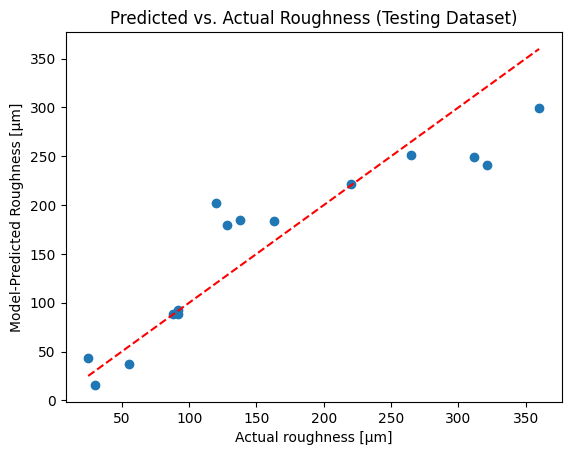

In [61]:
# fit the testing data to the above-trained model
y_test_prediction = roughness_model.predict(X_test)

# visualize the the actual vs. predicted output values on a scatter plot
plt.scatter(y_test, y_test_prediction)

# plotting dotted red line representing theoretically perfect correlation
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual roughness [µm]")
plt.ylabel("Model-Predicted Roughness [µm]")
plt.title(label="Predicted vs. Actual Roughness (Testing Dataset)")
plt.show()

In [62]:
# using scikit metrics class to determine r2-score and MAPE of model performance on testing data
roughness_test_r2 = round(metrics.r2_score(y_test, y_test_prediction),3)
roughness_test_mape = round(100 * metrics.mean_absolute_percentage_error(y_test, y_test_prediction),2)

print("r^2 score: ", roughness_test_r2)
print("Mean Absolute Percentage Error: ", roughness_test_mape, "%")

r^2 score:  0.839
Mean Absolute Percentage Error:  25.23 %


For a summary and final analysis of these models, as well as those for outputs 2 and 3, refer to the Discussion section at the bottom of this report.

## Output 2 — Analyzing 3D print parameter influence on ultimate tensile strength [MPa]

The analyses for outputs 2 and 3 remain the same — we will assign the output label as ultimate tensile strength and elongation respectively, train our data with the same 70-30 train/test split, and evaluate the predictive performance of the linear regression models for these properties of interest.

In [63]:
# assign ultimate tensile strength column as output label
y = print_data['tension_strength']

In [64]:
# split both parameter and label data into 70-30 train-test split
# 'random_state' seed is added to obtain identical results each time the program is ran
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

# fit scikit-learn's Ordinary Least Squares linear regression model to training data
uts_model = LinearRegression() # 'uts' = ultimate tensile strength
uts_model.fit(X_train, y_train)

constant = uts_model.intercept_ # regression equation constant term
coefficients = uts_model.coef_ # regression equation parameter coefficients

In [65]:
# display equation for readability
uts_equation = "UTS [MPa] = {}".format(round(constant,3))
for i, coeff in enumerate(coefficients):
    sign = '+'
    if coeff < 0:
        sign = ''
    uts_equation += "\n {}{} * {}".format(sign, round(coeff,3), params[i])

print(uts_equation)

UTS [MPa] = 311.596
 +55.586 * layer_height
 +1.479 * wall_thickness
 +0.168 * infill_density
 -0.963 * infill_pattern
 -1.44 * nozzle_temperature
 +0.056 * bed_temperature
 +0.005 * print_speed
 -26.459 * material
 +0.281 * fan_speed


We will again plot the model-predicted UTS values vs. the actual values from the training data. Just as before, the dotted red line represents the line of perfect correlation.

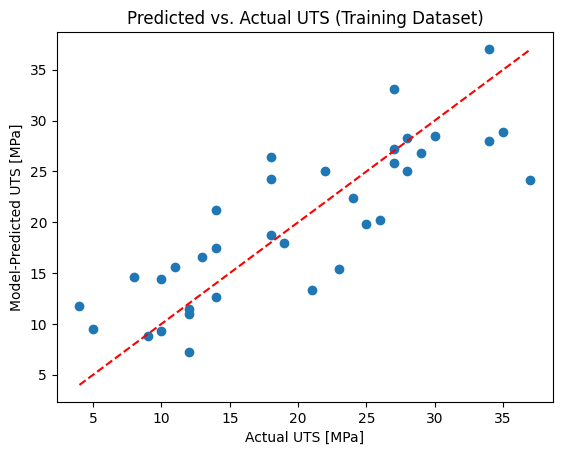

In [66]:
# fit the testing data to the above-trained model
y_train_prediction = uts_model.predict(X_train)

# visualize the the actual vs. predicted output values on a scatter plot
plt.scatter(y_train, y_train_prediction)

# plotting dotted red line representing theoretically perfect correlation
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual UTS [MPa]")
plt.ylabel("Model-Predicted UTS [MPa]")
plt.title(label="Predicted vs. Actual UTS (Training Dataset)")
plt.show()

In [67]:
# using scikit metrics class to determine r2-score and MAPE of model's fit to training data
uts_train_r2 = round(metrics.r2_score(y_train, y_train_prediction),3)
uts_train_mape = round(100 * metrics.mean_absolute_percentage_error(y_train, y_train_prediction),2)

print("r^2 score: ", uts_train_r2)
print("Mean Absolute Percentage Error: ", uts_train_mape, "%")

r^2 score:  0.693
Mean Absolute Percentage Error:  28.07 %


The r2-score obtained for this linear regression analysis is acceptable and statistically significant (r^2 > 0.50), but the trained model aligns slightly less well than the model for roughness. The data appears to be more dispersed around the line of perfrect correlation.

The Mean Absolute Percentage Error (MAPE) remains below 25%, which indicates acceptable predictive power.

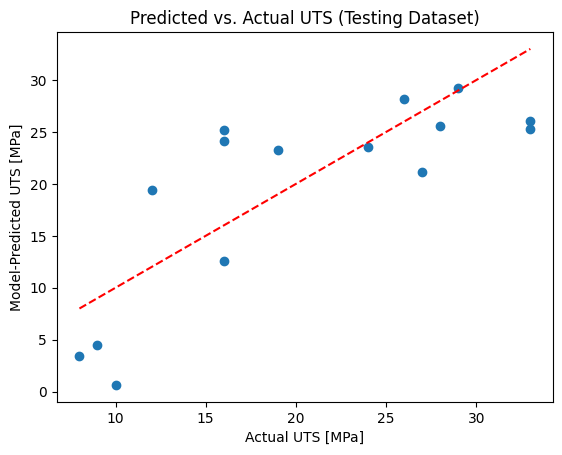

In [68]:
# fit the testing data to the above-trained model
y_test_prediction = uts_model.predict(X_test)

# visualize the the actual vs. predicted output values on a scatter plot
plt.scatter(y_test, y_test_prediction)

# plotting dotted red line representing theoretically perfect correlation
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual UTS [MPa]")
plt.ylabel("Model-Predicted UTS [MPa]")
plt.title(label="Predicted vs. Actual UTS (Testing Dataset)")
plt.show()

In [69]:
# using scikit metrics class to determine r2-score and MAPE of model performance on testing data
uts_test_r2 = round(metrics.r2_score(y_test, y_test_prediction),3)
uts_test_mape = round(100 * metrics.mean_absolute_percentage_error(y_test, y_test_prediction),2)

print("r^2 score: ", uts_test_r2)
print("Mean Absolute Percentage Error: ", uts_test_mape, "%")

r^2 score:  0.512
Mean Absolute Percentage Error:  33.4 %


## Output 3 — Analyzing 3D print parameter influence on elongation [%]

Repeat the same steps as above for output 3; note that the 'elongation' property of these 3D printed parts are defined as the strain that the part can undergo when subjected to a standardized amount of tensile stress [7].

In [70]:
# assign elongation column as output label
y = print_data['elongation']

In [71]:
# split both parameter and label data into 70-30 train-test split
# 'random_state' seed is added to obtain identical results each time the program is ran
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# fit scikit-learn's Ordinary Least Squares linear regression model to training data
elongation_model = LinearRegression() # 'uts' = ultimate tensile strength
elongation_model.fit(X_train, y_train)

constant = elongation_model.intercept_ # regression equation constant term
coefficients = elongation_model.coef_ # regression equation parameter coefficients

In [72]:
# display equation for readability
elongation_equation = "Elongation [%] = {}".format(round(constant,3))
for i, coeff in enumerate(coefficients):
    sign = '+'
    if coeff < 0:
        sign = ''
    elongation_equation += "\n {}{} * {}".format(sign, round(coeff,3), params[i])

print(elongation_equation)

Elongation [%] = 27.657
 +6.374 * layer_height
 -0.013 * wall_thickness
 +0.009 * infill_density
 -0.029 * infill_pattern
 -0.123 * nozzle_temperature
 +0.005 * bed_temperature
 -0.005 * print_speed
 -1.965 * material
 +0.024 * fan_speed


Below is a plot of the model-predicted elongation values vs. the actual values from the training data:

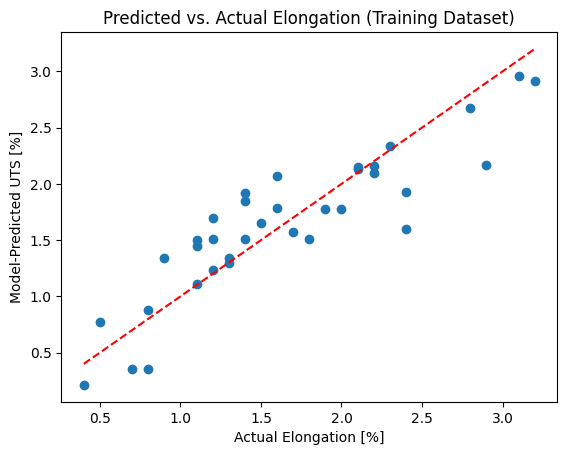

In [73]:
# fit the testing data to the above-trained model
y_train_prediction = elongation_model.predict(X_train)

# visualize the the actual vs. predicted output values on a scatter plot
plt.scatter(y_train, y_train_prediction)

# plotting dotted red line representing theoretically perfect correlation
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Elongation [%]")
plt.ylabel("Model-Predicted UTS [%]")
plt.title(label="Predicted vs. Actual Elongation (Training Dataset)")
plt.show()

In [74]:
# using scikit metrics class to determine r2-score and MAPE of model's fit to training data
elongation_train_r2 = round(metrics.r2_score(y_train, y_train_prediction),3)
elongation_train_mape = round(100 * metrics.mean_absolute_percentage_error(y_train, y_train_prediction),2)

print("r^2 score: ", elongation_train_r2)
print("Mean Absolute Percentage Error: ", elongation_train_mape, "%")

r^2 score:  0.792
Mean Absolute Percentage Error:  19.62 %


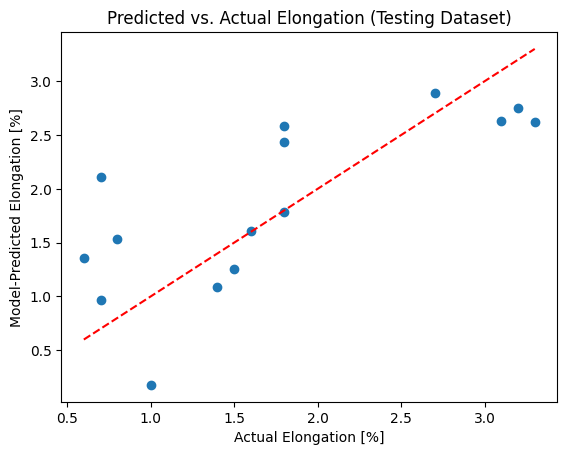

In [75]:
# fit the testing data to the above-trained model
y_test_prediction = elongation_model.predict(X_test)

# visualize the the actual vs. predicted output values on a scatter plot
plt.scatter(y_test, y_test_prediction)

# plotting dotted red line representing theoretically perfect correlation
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Elongation [%]")
plt.ylabel("Model-Predicted Elongation [%]")
plt.title(label="Predicted vs. Actual Elongation (Testing Dataset)")
plt.show()

In [76]:
# using scikit metrics class to determine r2-score and MAPE of model performance on testing data
elongation_test_r2 = round(metrics.r2_score(y_test, y_test_prediction),3)
elongation_test_mape = round(100 * metrics.mean_absolute_percentage_error(y_test, y_test_prediction),2)

print("r^2 score: ", elongation_test_r2)
print("Mean Absolute Percentage Error: ", elongation_test_mape, "%")

r^2 score:  0.521
Mean Absolute Percentage Error:  47.72 %


# Discussion

## Summary

Below is a summary table detailing the r2-score and MAPE of each model, for both the training and testing datasets.

In [77]:
# tabulate a summary of r2-score and MAPE For training and testing data for all three models

data = [
    ["[TRAINING] r2-Score", roughness_train_r2, uts_train_r2, elongation_train_r2],
    ["[TRAINING] MAPE", str(roughness_train_mape) + " %", str(uts_train_mape) + " %", str(elongation_train_mape) + " %"],
    ['','','',''],
    ["[TESTING] r2-Score", roughness_test_r2, uts_test_r2, elongation_test_r2],
    ["[TESTING] MAPE", str(roughness_test_mape) + " %", str(uts_test_mape) + " %", str(elongation_test_mape) + " %"]
]

print(tabulate(data, headers=["", "Model 1 [Roughness]", "Model 2 [UTS]", "Model 3 [Elongation]"]))

                     Model 1 [Roughness]    Model 2 [UTS]    Model 3 [Elongation]
-------------------  ---------------------  ---------------  ----------------------
[TRAINING] r2-Score  0.873                  0.693            0.792
[TRAINING] MAPE      19.67 %                28.07 %          19.62 %

[TESTING] r2-Score   0.839                  0.512            0.521
[TESTING] MAPE       25.23 %                33.4 %           47.72 %


## Model Performance Discussion

### Output 1 - Rougness

The resultant r2-score of 0.839 for the testing portion of the analysis shows a strong correlation similar to that which we saw with the training data set. The MAPE, sitting at ~25%, is in an acceptable range where we can expect that the model will do a reasonable job of predicting close to what the roughness of 3D-prints will be, based on the parameters of those prints. However, just as will be shown in the following two output summaries, the fit is not perfect and our analyses may benefit from other deep learning techniques that may necessitate more data.


### Output 2 - UTS

In the training dataset, but especially in the testing results, the trend between model-predicted and actual UTS is present, but a significant dispersion of data around the line of perfect correlation is observable. The r2-score of 0.512 is statistically significant but not as high as we would deem necessary to have valuable predictive power.


### Output 3 - Elongation

Just as for UTS, the r2-score of 0.521 is significant but the linear regression technique does not predict strain (elongation) of printed parts as well as it predicts roughness.


## Conclusion and Limitations

From the results that we've collected in our three separate analyses, we can say with a reasonable degree of confidence that given the dataset's 9 input parameters, we can make somewhat reasonable predictions about all three parameters of interest, but with greater emphasis on the roughness of a final 3D-printed part.

In retrospect, the choice of linear regression to conduct these analyses was in large part due to the fact that for rigid objects (like 3D-printed parts), structural analysis often employs linearization techniques or approximations — consider the linear nature of Finite Element Analysis (FEA) techniques, as well as the theory of superposition, and Hooke's law. Further, this method is quite computationally light and can be extended easily to large-scale printing datasets which, in theory, companies could take advantage of at low cost.

However, our results suggest that other techniques may have more effectively predicted the same physical properties of printed parts. One such framework is the convolutional neural network (CNN), whose structure would be best suited for large-scale classification of images as a function of the predicted outputs of interest. In this analysis, a CNN-based model would be trained on on a large corpus of image data of parts during the printing process, with the end goal of predicting their physical properties post-print.

The main disadvantage of this method is that it may require much more data than we have present in our current dataset; given this resource however, a CNN may be a more suitable option for producing reliable and more consistent predictive power over the final state of a 3D-printed part.

# References:

[1] “Advantages of 3D Printing (and Disadvantages) Complete Guide - TRACTUS3D.” Tractus3D, tractus3d.com/knowledge/learn-3d-printing/advantages-of-3d-printing. Accessed 4 Dec. 2023. 

[2] Meram, Ahmet, and Betül Sözen. “Investigation on the manufacturing variants influential on the strength of 3D printed products.” Research on Engineering Structures and Materials, 15 Apr. 2020, https://doi.org/10.17515/resm2019.171me3112. 

[3] “The Importance of the Type of Infill in 3D Printing.” Filament2Print, 4 Nov. 2019, filament2print.com/gb/blog/71_importance-infill-3d-printing.html. 

[4] Bishop, Christopher M. Pattern Recognition and Machine Learning. Springer, 2006. 

[5] Chapter 2: Ordinary Least Squares - Simon Fraser University, www.sfu.ca/~dsignori/buec333/lecture%208.pdf. Accessed 5 Dec. 2023. 

[6] “Coefficient of Determination, R-Squared.” Numeracy, Maths and Statistics - Academic Skills Kit, www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html. Accessed 4 Dec. 2023. 

[7] Melito, Steve. “Physical Properties of Rubber: Elasto Proxy.” Elastoproxy, 8 Oct. 2023, www.elastoproxy.com/physical-properties-of-rubber-basics-for-buyers-and-designers/.